<a href="https://colab.research.google.com/github/juanbrekes/Hackatons/blob/main/Hackatons/2%20-%20Soccer%20Fever%20-%2020210821/Soccer_Result_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The  Soccer Fever

Soccer aka Football is the most popular game in the world. It’s a religion of its own. If groups of 10 people can stop time and make people watch them in awe and reverence, it’s this beautiful game. Also, anybody can play soccer- all it needs is 4 poles, a ground and a ball. You can just get started with the play.

In fact, Nelson Mandela very effectively used Football as the unifying factor when he was elected President of South Africa post the Apartheid era. The sport just cuts across all discriminating factors.

We live in ambiguity and always need some information to just make a decision. Decisions are made based on possible outcomes. Win/ Loss/ Pass / Fail etc.

The below problem statement is a classic study for decision-making and understanding the odds stacked against a particular situation.

**About the Dataset**

*   Train: 7443 rows x 21 columns (Target variable: 'Outcome')
*   Test: 4008 rows x 20 columns
*   Evaluation Metric: Log Loss

The data is part of one of MachineHack's Hackathons and can be obtained from [this link](https://machinehack.com/hackathons/soccer_fever_weekend_hackathon_edition_2_the_last_hacker_standing/data)

## Step 1: Load the Data and perform EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Projects/Machinehack Hackatons/2 - Soccer Fever - 20210821/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Projects/Machinehack Hackatons/2 - Soccer Fever - 20210821/test.csv')

Some metadata and info about the variables of the dataset can be obteined from [this link](https://api-docs.datarobot.com/docs/soccer-match-prediction)

In [ ]:
train.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05,0
4,2019,01/03/19,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10,1


In [ ]:
test.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that there are a lot of NaN values in some columns of the test data...

In [ ]:
nan_count_train = train.isnull().sum()
nan_count_test = test.isnull().sum()

print('NaN in Train dataset: ')
print(nan_count_train)
print('\nNan in Test dataset: ')
print(nan_count_test)

NaN in Train dataset: 
season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4916
importance2    4916
score1         4800
score2         4800
xg1            5728
xg2            5728
nsxg1          5728
nsxg2          5728
adj_score1     5728
adj_score2     5728
Outcome           0
dtype: int64

Nan in Test dataset: 
season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4008
importance2    4008
score1         4008
score2         4008
xg1            4008
xg2            4008
nsxg1          4008
nsxg2          4008
adj_score1     4008
adj_score2     4008
dtype: int64


In [ ]:
test_columns = test.columns

nan_columns = [col for col in test_columns if test[col].isnull().sum() > 0]
nan_columns

['importance1',
 'importance2',
 'score1',
 'score2',
 'xg1',
 'xg2',
 'nsxg1',
 'nsxg2',
 'adj_score1',
 'adj_score2']

The same columns have missing values in both train and test dataset, so I'll drop them in both df, and also drop the columns 'date' since I don't think it's relevant in this case, and 'league_id', since it gives the same information as 'league'

In [ ]:
train_clean = train.drop(nan_columns, axis = 1)
test_clean = test.drop(nan_columns, axis = 1)

train_clean = train_clean.drop(['date', 'league_id'], axis = 1)
test_clean = test_clean.drop(['date', 'league_id'], axis = 1)

In [ ]:
train_clean

,season,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,Outcome
0,2019,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,1
1,2019,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,0
2,2019,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,1
3,2019,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,0
4,2019,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,1
...,...,...,...,...,...,...,...,...,...
7438,2021,German 2. Bundesliga,Karlsruher SC,1. FC Heidenheim 1846,34.05,33.76,1.39,1.19,1
7439,2021,German 2. Bundesliga,SC Paderborn,SV Darmstadt 98,36.73,36.11,1.67,1.44,1
7440,2021,South African ABSA Premier League,Moroka Swallows,Orlando Pirates,12.97,23.59,1.05,1.50,0
7441,2021,South African ABSA Premier League,Tshakhuma Tsha Madzivhandila,Black Aces,11.76,18.07,1.22,1.46,0


In [ ]:
cat_cols = train_clean.select_dtypes(include = 'object')
cat_cols = cat_cols.columns
cat_cols

Index(['league', 'Team 1', 'Team2'], dtype='object')

In [ ]:
def unique_values(cols):
  for col in cols:
    print("N° of unique values on column ", col, ':')
    print(len(train_clean[col].unique()))

unique_values(cat_cols)

N° of unique values on column  league :
39
N° of unique values on column  Team 1 :
657
N° of unique values on column  Team2 :
657


I think 'Team 1' and 'Team2' don't give me any aditional information, because the most important factor here is 'SPI1' and 'SPI2'. I'll try only usin this variables, and 'league' for the prediction.

In [ ]:
train_clean = train_clean.drop(['Team 1', 'Team2', 'league'], axis = 1)
test_clean = test_clean.drop(['Team 1', 'Team2', 'league'], axis = 1)

In [ ]:
train_clean.head()

,season,SPI1,SPI2,proj_score1,proj_score2,Outcome
0,2019,48.22,37.83,1.75,0.84,1
1,2019,39.81,60.08,1.22,1.89,0
2,2019,65.59,39.99,2.58,0.62,1
3,2019,32.25,54.82,1.10,1.79,0
4,2019,38.24,40.45,1.57,1.24,1


## Step 2: Create a model

This is a binary classification problem. I'll try with XGBoost, desicion tree and logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
X = train_clean.drop(['Outcome'], axis = 1)
y = train_clean['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Log Loss value for this model: 
0.23201542386717175


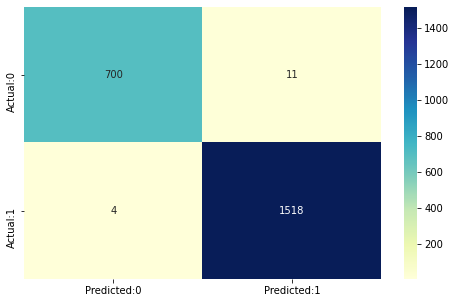

In [ ]:
Y_pred = log_reg.predict(X_test_scaled)

cm = confusion_matrix(Y_test,Y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

print('Log Loss value for this model: ')
print(log_loss(Y_test,Y_pred))

## 2.2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 20, min_samples_leaf = 5)
  
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Log Loss value for this model: 
0.4330934764975164


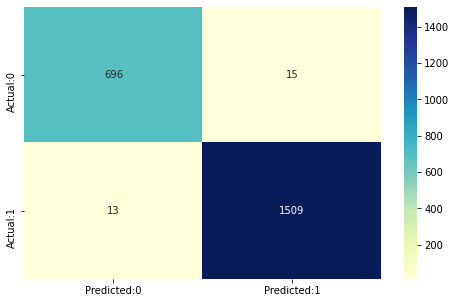

In [ ]:
Y_pred2 = d_tree.predict(X_test)

cm2 = confusion_matrix(Y_test,Y_pred2)

conf_matrix2 = pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix2, annot=True,fmt='d',cmap="YlGnBu");

print('Log Loss value for this model: ')
print(log_loss(Y_test,Y_pred2))

## 2.3: XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X2 = train_clean.drop(['Outcome'], axis = 1)
y2 = train_clean['Outcome']

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size= 0.3, random_state= 42)

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train2, Y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Log Loss value for this model: 
0.32482073401689165


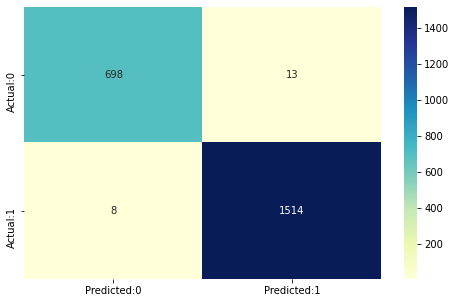

In [ ]:
Y_pred3 = XGB_model.predict(X_test2)

cm3 = confusion_matrix(Y_test2,Y_pred3)

conf_matrix3 = pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix3, annot=True,fmt='d',cmap="YlGnBu");

print('Log Loss value for this model: ')
print(log_loss(Y_test2,Y_pred3))

Parameter optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
#Random Search
params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        }
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=100,                                   
                                   scoring='neg_log_loss', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 17.2min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
print('The best parameters for the model are:')
print(random_search.best_params_)
print('The best score obtained is: ')
print(random_search.best_score_)

The best parameters for the model are:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 1.0}
The best score obtained is: 
-0.02646203089034892


In [ ]:
best_params = random_search.best_params_
new_XGB_model = XGBClassifier(max_depth=5, gamma=0.5, subsample=0.8, n_estimators=200)
new_XGB_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

Log Loss value for this model: 
0.32482037593474644


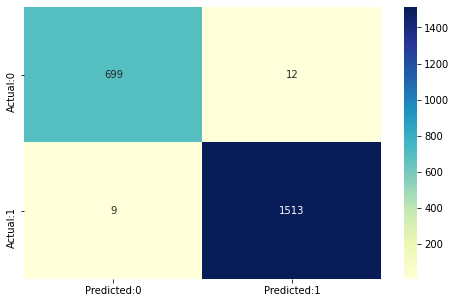

In [ ]:
Y_pred4 = new_XGB_model.predict(X_test)

cm4 = confusion_matrix(Y_test,Y_pred4)

conf_matrix4 = pd.DataFrame(data=cm4,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix4, annot=True,fmt='d',cmap="YlGnBu");

print('Log Loss value for this model: ')
print(log_loss(Y_test,Y_pred4))

So the best model is Logistic Regression

## Step 3: Making predictions for submission

In [ ]:
X_final = test_clean

In [ ]:
X_final = test_final

X_final_scaled = scaler.transform(X_final)

Y_pred_final = log_reg.predict(X_final_scaled)

In [ ]:
Y_pred_final

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
predic = pd.DataFrame(Y_pred_final,columns=["Outcome"] )

predic.to_csv('/content/gdrive/MyDrive/Machine Learning Projects/Machinehack Hackatons/2 - Soccer Fever - 20210821/Predictions Juan.csv', index=False)